In [1]:
import FinanceDataReader as fdr


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [6]:
bitcoin_data = pd.read_csv('C:/Users/johnkim/Downloads/clean_bitcoin_data.csv')

bitcoin_data.isna().sum()

print(bitcoin_data)

            Date    Close     Open     High      Low  Trade_Volume  \
0     2017-01-01    995.4    963.4   1001.6    956.1       41150.0   
1     2017-01-02   1017.0    995.4   1031.7    990.2       64950.0   
2     2017-01-03   1033.3   1017.0   1035.5   1006.5       54790.0   
3     2017-01-04   1135.4   1033.3   1148.5   1022.3      156270.0   
4     2017-01-05    989.3   1135.4   1150.6    874.5      240010.0   
...          ...      ...      ...      ...      ...           ...   
2825  2024-09-26  65175.7  63157.2  65770.9  62693.3       96060.0   
2826  2024-09-27  65776.3  65168.8  66440.7  64839.2       80550.0   
2827  2024-09-28  65866.5  65775.6  66232.5  65438.1       35000.0   
2828  2024-09-29  65607.1  65862.8  66065.7  65436.8       32600.0   
2829  2024-09-30  63339.2  65607.0  65607.0  62901.1      101700.0   

      change_percent rise_fall  
0               3.33      rise  
1               2.17      rise  
2               1.60      rise  
3               9.88      f

In [7]:
#지수 이동 평균(EMA), 단순 이동 평균(SMA)

# Calculate the Simple Moving Average (SMA) and Exponential Moving Average (EMA)
# Adding a window size of 14 days for both SMA and EMA calculations

window_SMAsize = 50
window_EMAsize = 200

# Adding SMA and EMA columns to the dataframe
bitcoin_data['SMA'] = bitcoin_data['Close'].rolling(window=window_SMAsize).mean()
bitcoin_data['EMA'] = bitcoin_data['Close'].ewm(span=window_EMAsize, adjust=False).mean()

# Display the updated dataframe with SMA and EMA columns
import ace_tools as tools; tools.display_dataframe_to_user(name="Bitcoin Data with SMA and EMA", dataframe=bitcoin_data)

# Display the first few rows of the updated dataframe
bitcoin_data.head()


ModuleNotFoundError: No module named 'ace_tools'

In [12]:
# Remove any row that contains NaN values in any column
bitcoin_data = bitcoin_data.dropna()

# Verifying that no NaN values remain
bitcoin_data.isna().sum(), bitcoin_data_cleaned.shape


(Date              0
 Close             0
 Open              0
 High              0
 Low               0
 Trade_Volume      0
 change_percent    0
 rise_fall         0
 SMA               0
 EMA               0
 dtype: int64,
 (2781, 10))

In [13]:
bitcoin_data_cleaned

,Date,Close,Open,High,Low,Trade_Volume,change_percent,rise_fall,SMA,EMA
49,2017-02-19,1048.9,1052.3,1056.5,1037.7,17950.0,-0.32,rise,951.056,980.292295
50,2017-02-20,1077.6,1048.9,1081.8,1041.0,31010.0,2.73,rise,952.700,981.260531
51,2017-02-21,1119.0,1077.6,1123.0,1073.5,57050.0,3.85,rise,954.740,982.631073
52,2017-02-22,1120.5,1119.0,1132.3,1094.8,47910.0,0.13,rise,956.484,984.002903
53,2017-02-23,1171.9,1120.5,1181.6,1113.5,65740.0,4.59,rise,957.214,985.872526
...,...,...,...,...,...,...,...,...,...,...
2825,2024-09-26,65175.7,63157.2,65770.9,62693.3,96060.0,3.20,rise,59932.044,59653.490061
2826,2024-09-27,65776.3,65168.8,66440.7,64839.2,80550.0,0.92,rise,60013.576,59714.413543
2827,2024-09-28,65866.5,65775.6,66232.5,65438.1,35000.0,0.14,fall,60113.894,59775.628334
2828,2024-09-29,65607.1,65862.8,66065.7,65436.8,32600.0,-0.39,fall,60207.402,59833.652928


C:\Users\johnkim\AppData\Local\Temp\ipykernel_39496\1213694404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])


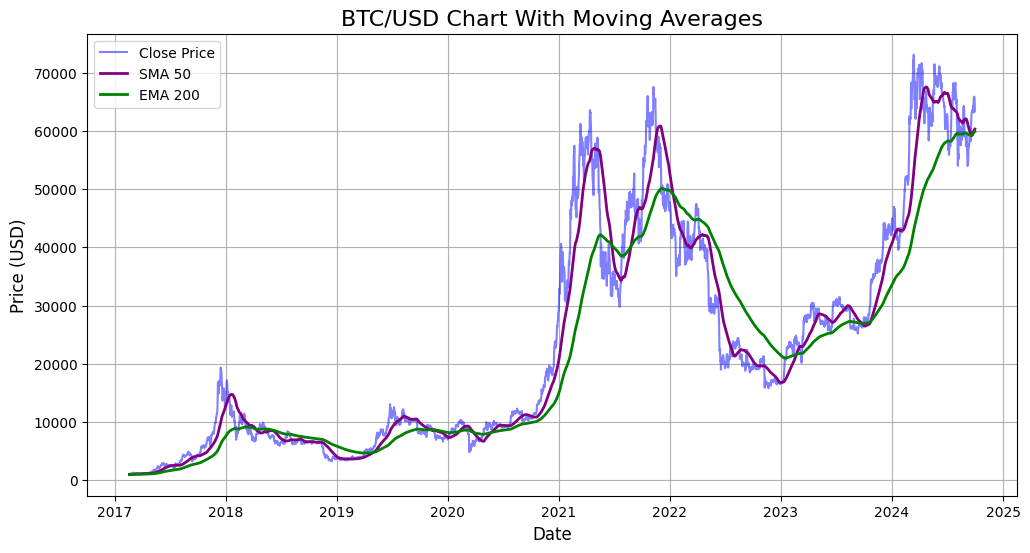

In [14]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime for proper plotting
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Plotting the Close price along with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(bitcoin_data['Date'], bitcoin_data['SMA'], label=f'SMA {window_SMAsize}', color='purple', linewidth=2)
plt.plot(bitcoin_data['Date'], bitcoin_data['EMA'], label=f'EMA {window_EMAsize}', color='green', linewidth=2)

# Adding labels and title
plt.title('BTC/USD Chart With Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [16]:
bitcoin_data.head()

,Date,Close,Open,High,Low,Trade_Volume,change_percent,rise_fall,SMA,EMA
0,2024-10-01,60835.5,63329.9,64125.3,60195.9,134930.0,-3.95,rise,NaN,60835.500000
1,2024-09-30,63339.2,65607.0,65607.0,62901.1,101700.0,-3.46,rise,NaN,60860.412438
2,2024-09-29,65607.1,65862.8,66065.7,65436.8,32600.0,-0.39,rise,NaN,60907.643160
3,2024-09-28,65866.5,65775.6,66232.5,65438.1,35000.0,0.14,fall,NaN,60956.985019
4,2024-09-27,65776.3,65168.8,66440.7,64839.2,80550.0,0.92,fall,NaN,61004.938402


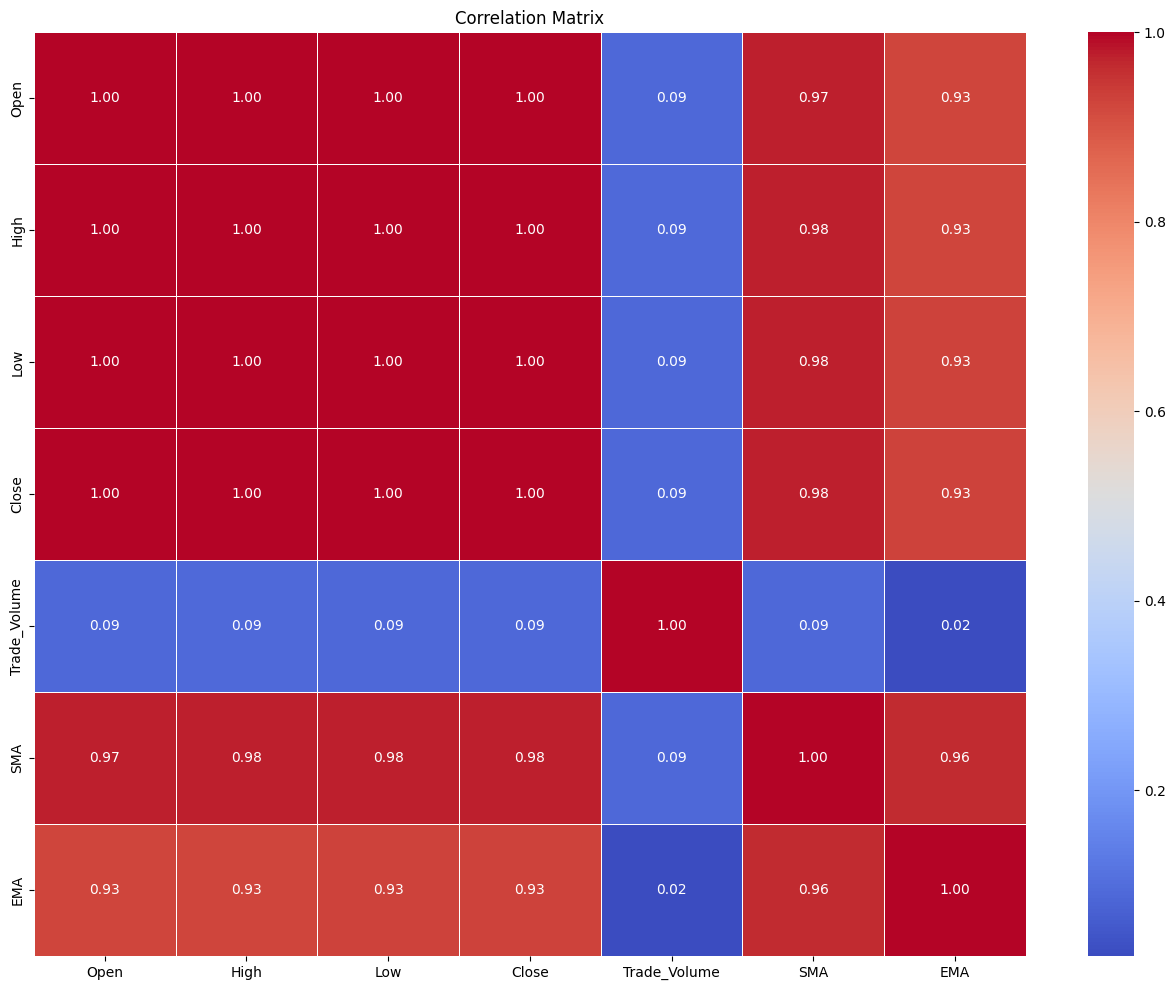

In [19]:
# 상관관계 행렬 계산
hm = bitcoin_data[['Open', 'High', 'Low', 'Close', 'Trade_Volume', 'SMA', 'EMA']]

corr = hm.corr()



# 상관관계 히트맵 그리기
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()